In [ ]:
###########################################
## Author : https://github.com/vidit1999 ##
###########################################

In [1]:
import re
import random
import requests

import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

%matplotlib inline

In [2]:
random.seed(0)
np.random.seed(0)

In [3]:
url = "https://en.wikipedia.org/wiki/Fake_news"

In [4]:
r = requests.get(url)
r

<Response [200]>

In [5]:
soup = BeautifulSoup(r.content, "html.parser")
print(soup.title.text)

Fake news - Wikipedia


In [6]:
stop_words = stopwords.words('english')
lemma = WordNetLemmatizer()

In [7]:
def clean_text(text):
    text = text.lower() # lowering
    text = text.encode("ascii", "ignore").decode() # non ascii chars
    text = re.sub(r'\n',' ', text) # remove new-line characters
    text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE) # to remove links that start with HTTP/HTTPS
    text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE) # to remove other url links
    text = re.sub(r'\W', ' ', text) # special chars
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # single char at first
    text = re.sub(r'[0-9]', ' ', text) # digits
    text = re.sub(r'\s+', ' ', text, flags=re.I) # multiple spaces
    return ' '.join([lemma.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])

In [8]:
clean_document = []

for p in soup.find_all('p'):
    clean = clean_text(p.text)
    if len(clean) > 0:
        clean_document.append(clean)

print(len(clean_document))

181


In [9]:
mask_array = np.array(Image.open("mask_image.png"))

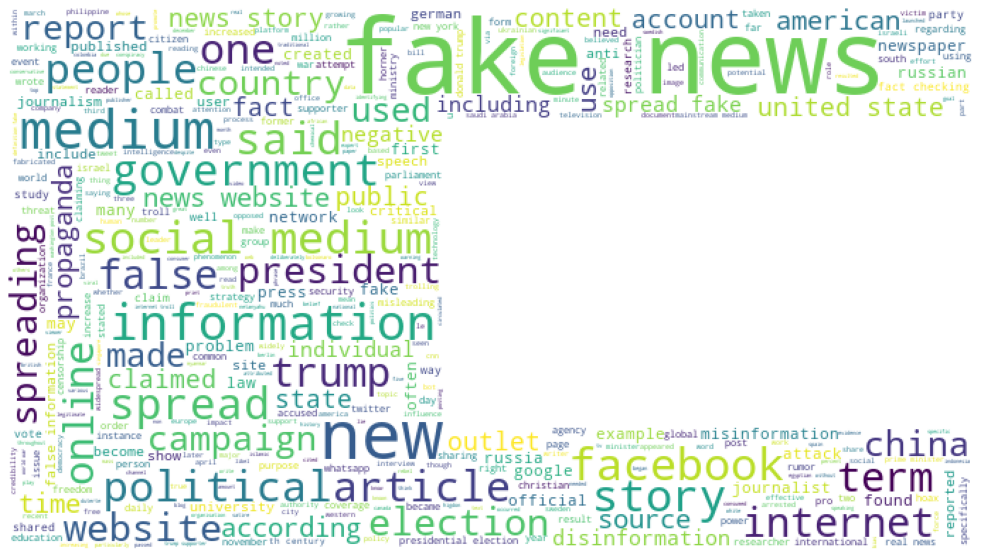

In [10]:
wc = WordCloud(width=2000, height=1000, background_color='white', mask=mask_array, max_words=1000, stopwords=STOPWORDS)
wc.generate(' '.join(clean_document))

plt.figure(figsize=(20, 10))

plt.imshow(wc)
plt.axis("off")

plt.savefig('wordcloud.png', bbox_inches='tight')
plt.show()